In [96]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib

import sys

sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting") #\plots.py")
from plots import *
from post_processing_class import TensorTomographyReconstruction, SH_Reconstruction, EXPSIN_Reconstruction

%reload_ext autoreload
%autoreload 2

In [47]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_11cube_4off_0align.mat"
Dummy = SH_Reconstruction(Dummy_path, dataset=True)


In [48]:
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_symbolic.mat"
symbolic = SH_Reconstruction(symbolic_path, dataset=False)

In [49]:
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_AD_python.mat"
AD = SH_Reconstruction(AD_path, dataset=False)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_156144\2954001503.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.6980939443356609 0.07880060890616829
0.6899999999999998 1.1102230246251565e-16
[0.27057158]
0.6322975063246459 0.12530809997489145
[0.29139707]


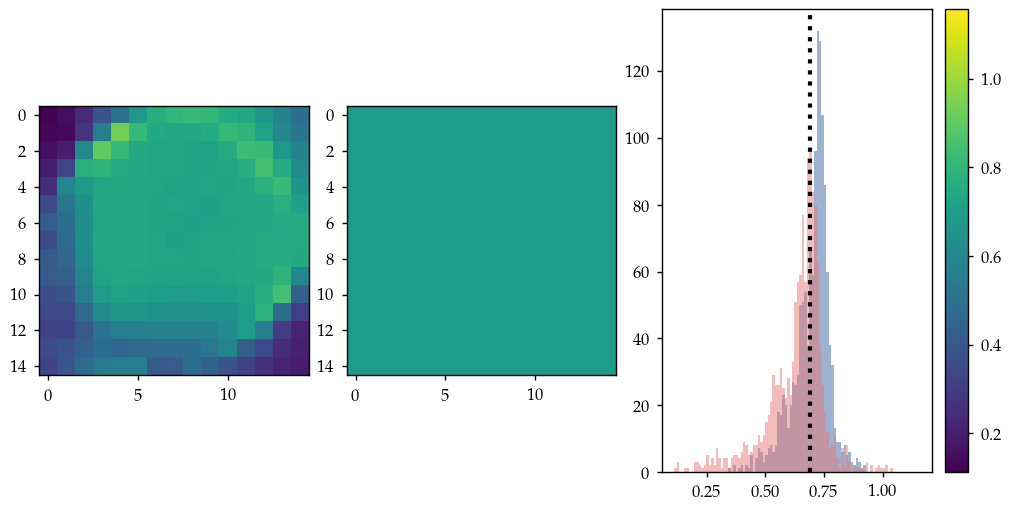

In [39]:
key = "a0"
slice1, slice2 = Dummy.slice
vmin = np.min(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 3* np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 3* np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

center = np.mean(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
std = np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(symbolic[key][slice1+5, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(Dummy[key][slice1+5, :, :], vmin=vmin, vmax=vmax)
vals = axs[2].hist(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), density=False, bins=100, range= r, alpha = 0.5)
axs[2].hist(AD[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), density=False, bins=100, range= r, alpha = 0.5)
counts = vals[0]
xaxis = vals[1]
#axs[2].hist(Dummy[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten()[:level], density= False, bins=100, range= r, alpha = 1)
axs[2].axvline(x=Dummy[key][0,0,0], color = "black", linestyle = ":")


print(np.mean(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(Dummy[key][:, :, :]), np.std(Dummy[key][:, :, :]))
print(symbolic.error_data[-1])

print(np.mean(AD[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(AD[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(AD.error_data[-1])


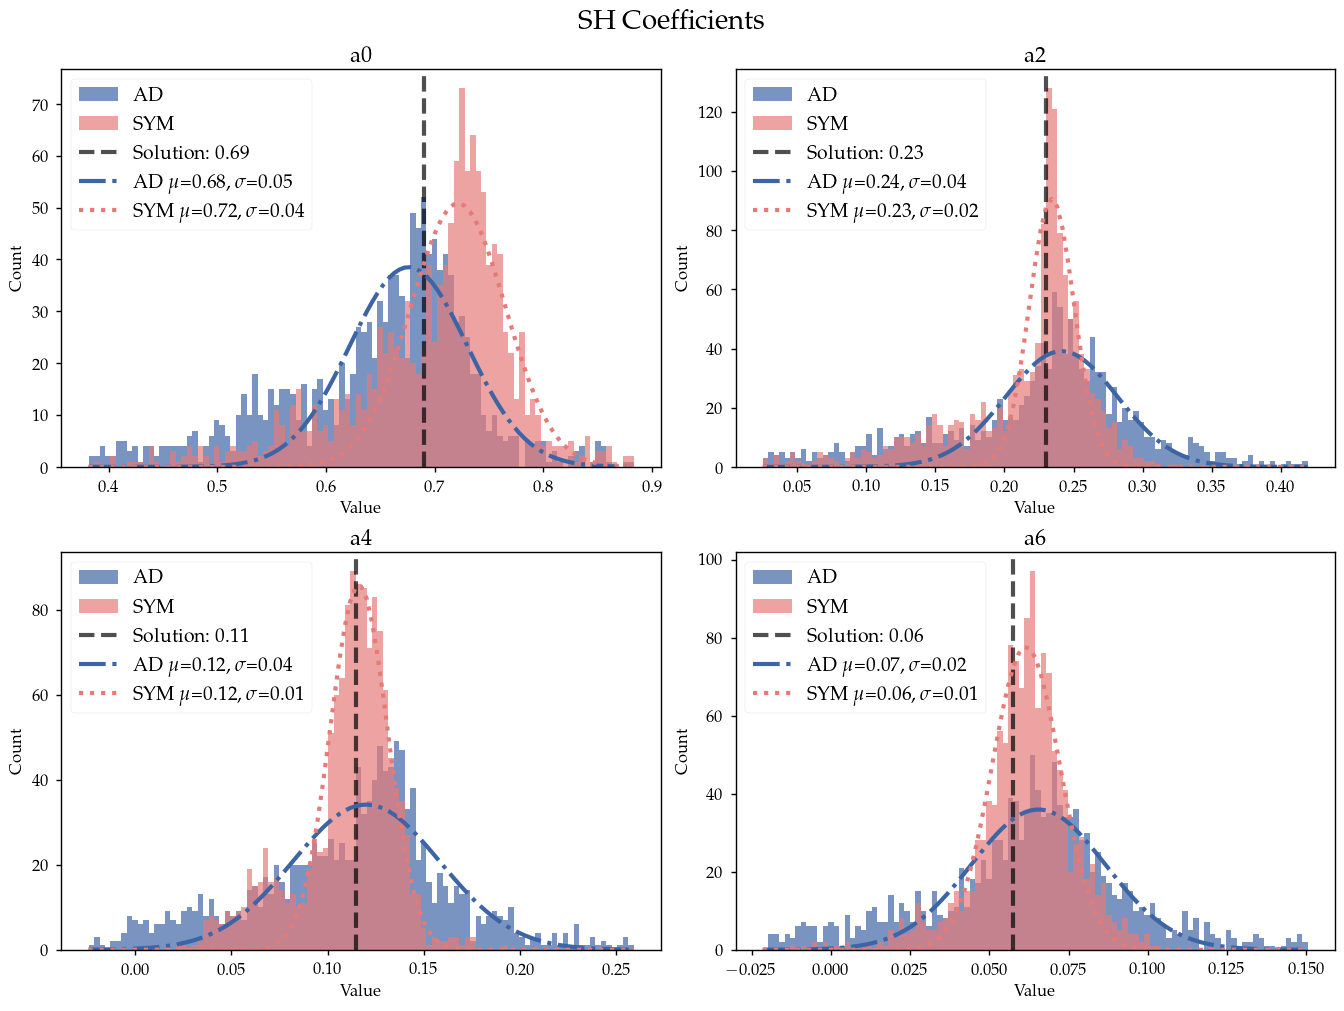

In [87]:
dummy_values = Dummy.params[:,0,0,0]
plot_SH_aligned_distribution(    AD,
    symbolic,
    dummy_values,
    Dummy.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="theis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100)

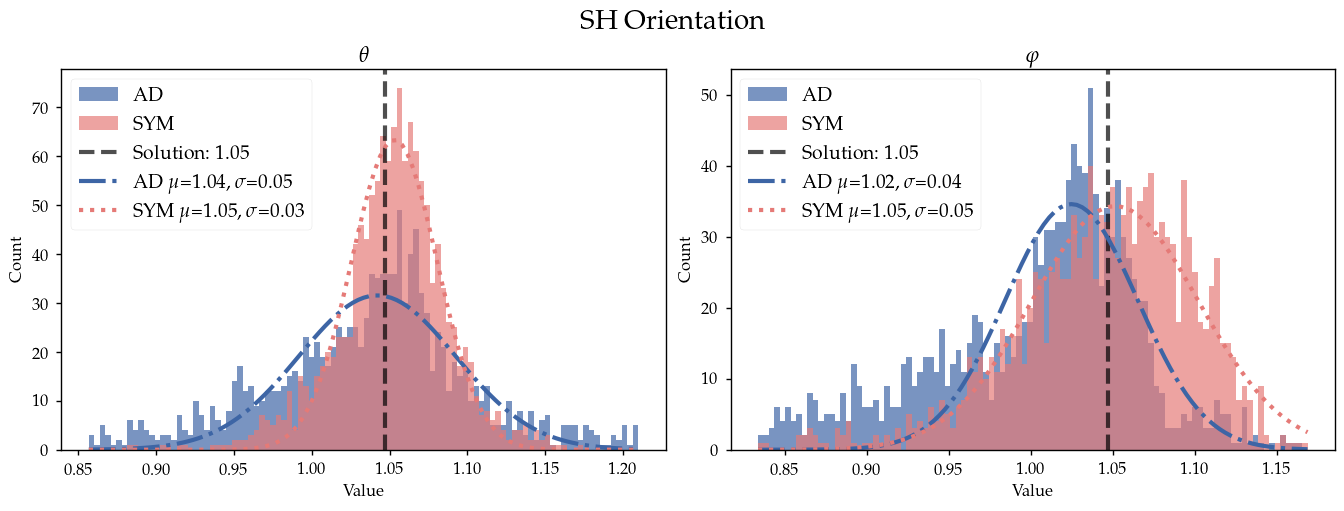

In [88]:
dummy_angles = Dummy.params[-2:,0,0,0]
plot_SH_aligned_distribution(    AD,
    symbolic,
    dummy_angles,
    Dummy.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="theis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100,
    shareaxis = True)

[[37.5741684]]


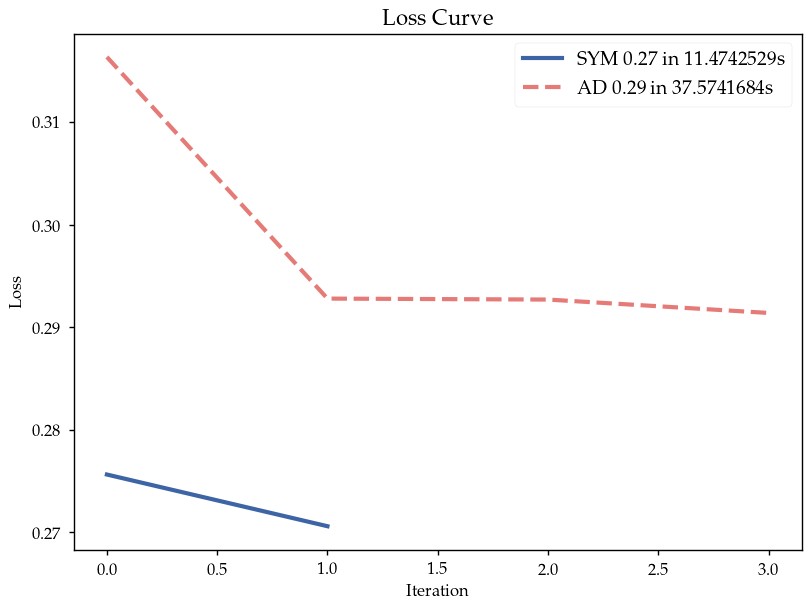

In [98]:
# Loss curves

loss_data = {}
loss_data["SYM"] = [symbolic.convergence_curve, symbolic.timing_data]
loss_data["AD"] = [AD.convergence_curve, AD.timing_data]

print(AD.timing_data)

plot_loss_curves(loss_data, save=False, DPI=100)